In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Plots the SSB data on a bar chart

In [4]:
#Link to website: https://www.ssb.no/en/statbank/table/12576/tableViewLayout2/
#Choose variables:
#Road traffic volumes (million km)
#Year: 2021
#Region: Select all
#Type of fuel: Electricity
#Vehicle type: All passenger cars
#Chose the table: Change table layout to layout 2
#Export as xlsx
#Manually remove the irrelevant information on the xlsx, proceed to alter position of table to Excel cell A1
#Create header matching header names in code ["Region", "2021"]

#Import SSB data
data=pd.read_excel("/Users/antonglad/Master/csv_excel/ssb_trafikk_volum.xlsx")

#Convert to pandas dataframe
trafikk=pd.DataFrame(data)


trafikk=trafikk.replace("21 Svalbard", "Svalbard")
trafikk=trafikk.replace("30 Viken", "Viken")
trafikk=trafikk.replace("03 Oslo", "Oslo")
trafikk=trafikk.replace("34 Innlandet", "Innlandet")
trafikk=trafikk.replace("38 Vestfold og Telemark", "Vestfold og Telemark")
trafikk=trafikk.replace("42 Agder", "Agder")
trafikk=trafikk.replace("11 Rogaland", "Rogaland")
trafikk=trafikk.replace("46 Vestland", "Vestland")
trafikk=trafikk.replace("15 Møre og Romsdal", "Møre og Romsdal")
trafikk=trafikk.replace("50 Trøndelag - Trööndelage", "Trøndelag")
trafikk=trafikk.replace("18 Nordland - Nordlánnda", "Nordland")
trafikk=trafikk.replace("54 Troms og Finnmark - Romsa ja Finnmárku", "Troms og Finnmark")




Text(0.5, 0, 'in Million Km')

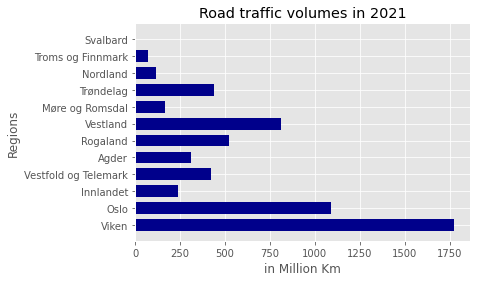

In [5]:
#Alternative plot - Simple
plt.style.use("ggplot")

plt.barh(trafikk["Region"], trafikk["2021"], color="darkblue", align="center", height=0.7)
plt.title("Road traffic volumes in 2021")
plt.ylabel("Regions")
plt.xlabel("in Million Km")



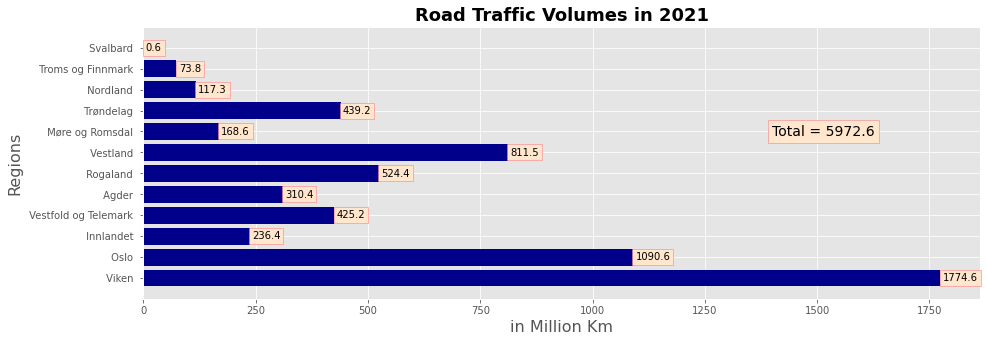

<Figure size 432x288 with 0 Axes>

In [6]:

#Less simple

def addlabels(x, y):
    for i in range(len(y)):
        plt.text(y[i] +5 , x[i], y[i] , fontsize=10, va="center", ha="left", bbox=dict(boxstyle="square",
                   ec=(1., 0.45, 0.5),
                   fc=(1., 0.9, 0.8),
                   ))

    plt.text(y[i] +1400 , x[7], "Total = 5972.6", va="center", size=14, bbox=dict(boxstyle="square",
                   ec=(1., 0.45, 0.5),
                   fc=(1., 0.9, 0.8),
                   ))

if __name__=="__main__":
    
    x=[' Viken ' ,
        ' Oslo ' ,
        ' Innlandet ' ,
        ' Vestfold og Telemark ' ,
        ' Agder ' ,
        ' Rogaland ' ,
        ' Vestland ' ,
        ' Møre og Romsdal ' ,
        ' Trøndelag ' ,
        ' Nordland ' ,
        ' Troms og Finnmark ' ,
        ' Svalbard ']

    y=[1774.6 ,
        1090.6 ,
        236.4 ,
        425.2 ,
        310.4 ,
        524.4 ,
        811.5 ,
        168.6 ,
        439.2 ,
        117.3 ,
        73.8 ,
        0.6 ]
    

    plt.figure(figsize=(15,5))

    plt.barh(x, width=y, color="darkblue")

    addlabels(x, y)

    plt.title("Road Traffic Volumes in 2021", fontweight="bold", fontsize=18)

    plt.ylabel("Regions", fontsize=16)

    plt.xlabel("in Million Km", fontsize=16)

    plt.show()

    plt.tight_layout()

    plt.savefig("trafikk_ssb.jpg", dpi=600)

In [7]:
#Change to easily read format before matplotlib plotting

for i in trafikk["Region"]:
    print ("'",i,"'", ",")

' Viken ' ,
' Oslo ' ,
' Innlandet ' ,
' Vestfold og Telemark ' ,
' Agder ' ,
' Rogaland ' ,
' Vestland ' ,
' Møre og Romsdal ' ,
' Trøndelag ' ,
' Nordland ' ,
' Troms og Finnmark ' ,
' Svalbard ' ,


In [8]:
#Change to easily read format before matplotlib plotting

x=[' Viken ' ,
' Oslo ' ,
' Innlandet ' ,
' Vestfold og Telemark ' ,
' Agder ' ,
' Rogaland ' ,
' Vestland ' ,
' Møre og Romsdal ' ,
' Trøndelag ' ,
' Nordland ' ,
' Troms og Finnmark ' ,
' Svalbard ']


In [9]:
#Change to easily read format before matplotlib plotting

for i in trafikk["2021"]:
    print (i,",")

1774.6 ,
1090.6 ,
236.4 ,
425.2 ,
310.4 ,
524.4 ,
811.5 ,
168.6 ,
439.2 ,
117.3 ,
73.8 ,
0.6 ,


In [10]:
#Calculate total usage in million km

total=0

for i in y:
    total+=i

print(total)
    

5972.6


In [11]:
import json
import os
import requests
import pandas as pd


Code for vehicle registration graphs

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
#Load in xlsx file retrieved from ofv.no - alternatively download from digitaliseringsdirektoratet.

data=pd.read_excel(r"/Users/antonglad/Master/csv_excel/bilsalg.xlsx")

data=pd.DataFrame(data)

In [14]:
data.head()

,Unnamed: 0,Nye personbiler,Bruktimportert personbiler,Total Andel,Nye diesel personbiler Andel,Nye ikkehybridsdiesel,Nye ikkehybridsdiesel Andel,Nye bensinbiler Andel,Nye ikkehybridsbensin,Nye ikkehybridsbensin Andel,Hybridspersonbiler,Hybrid Andel,Ladbare hybridspersonbiler,Ladbare Andel,Ikke-ladbare hybridspersonbiler,Ikke-ladbare Andel,Nye nullutslippspersonbiler,Nullutslipp Andel,Hydrogenbil,Bruktimport nullutslippspersonbiler
0,201507.0,12394.0,2286.0,NaN,0.404,NaN,0.397,0.453,NaN,0.333,1584.000,0.128,776.0,0.062611,NaN,0.065389,1764.0,0.142,NaN,369.0
1,201508.0,12594.0,1998.0,NaN,0.385,NaN,0.381,0.443,NaN,0.339,1360.000,0.108,468.0,0.037161,NaN,0.070839,2166.0,0.172,NaN,572.0
2,201509.0,12421.0,1898.0,0.999,0.399,NaN,0.392,0.428,NaN,0.310,1566.000,0.126,528.0,0.042509,NaN,0.083491,2130.0,0.171,NaN,570.0
3,201510.0,13197.0,1808.0,1.000,0.404,NaN,0.396,0.440,NaN,0.297,2005.944,0.152,945.0,0.071607,NaN,0.080393,2045.0,0.155,NaN,746.0
4,201511.0,12600.0,1538.0,1.000,0.405,NaN,0.396,0.436,NaN,0.287,1953.000,0.155,1062.0,0.084286,NaN,0.070714,2040.0,0.162,NaN,661.0


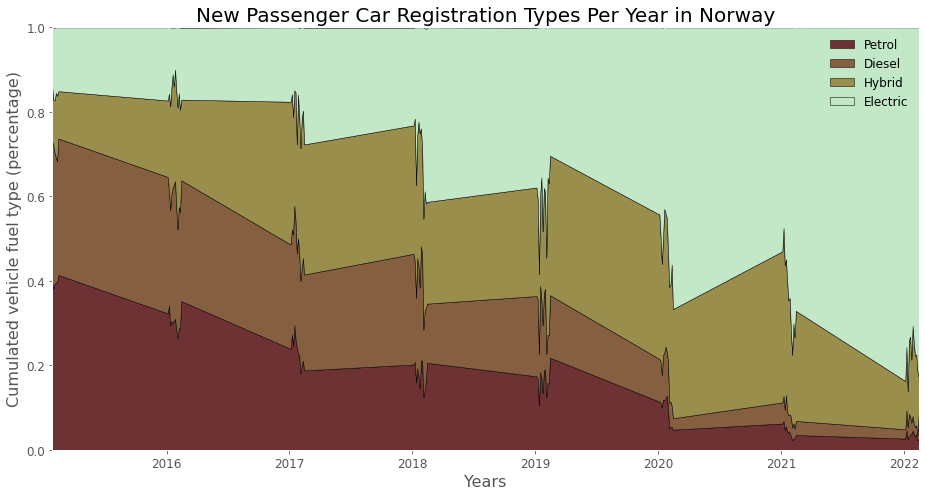

In [15]:
plt.figure(figsize=(13, 7))

plt.stackplot(data["Unnamed: 0"],
              [data['Nye ikkehybridsdiesel Andel'], data['Nye ikkehybridsbensin Andel'],
               data['Hybrid Andel'], data['Nullutslipp Andel']],
              labels=['Petrol', 'Diesel', 'Hybrid',  'Electric'],
              alpha=1, colors=["#6e3134", "#865f41", "#9a8e4d", "#c2e8c7"], ec="black")

plt.tick_params(labelsize=12)
plt.xlabel('Years', size=16)
plt.ylabel('Cumulated vehicle fuel type (percentage)', size=16)
# Set the y-axis limits to go from 0 to 1
plt.ylim(ymin=0, ymax=1)
plt.xticks([201600, 201700, 201800, 201900, 202000, 202100, 202200], ["2016", "2017", "2018", "2019", "2020", "2021", "2022"])
plt.title("New Passenger Car Registration Types Per Year in Norway", fontsize=20)

plt.legend(labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'], loc='upper right', fontsize='large', frameon=False)

# Set the x-axis limits to the first and last observations of the "Unnamed: 0" column
plt.xlim(xmin=data["Unnamed: 0"].min(), xmax=data["Unnamed: 0"].max())

plt.tight_layout()
plt.show()


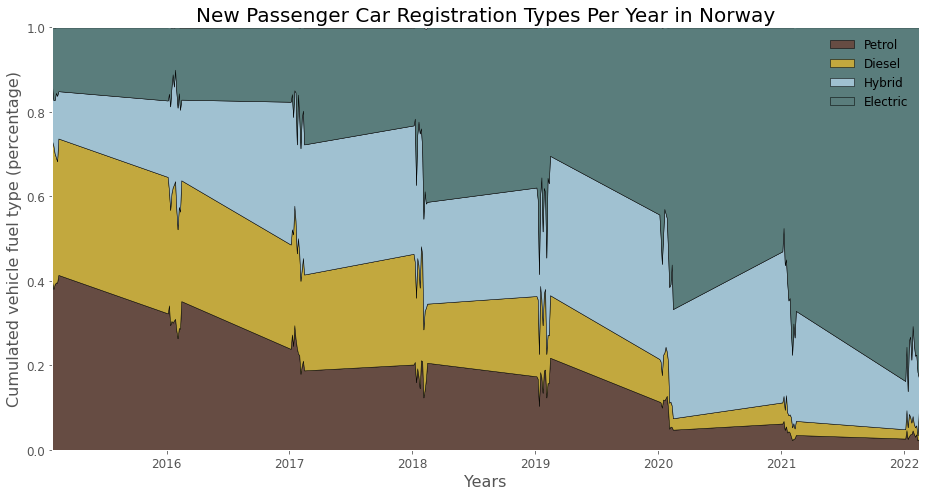

In [16]:
plt.figure(figsize=(13, 7))

plt.stackplot(data["Unnamed: 0"],
              [data['Nye ikkehybridsdiesel Andel'], data['Nye ikkehybridsbensin Andel'],
               data['Hybrid Andel'], data['Nullutslipp Andel']],
              labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'],
              alpha=1, colors=["#664C43", "#C2A83E", "#A0C1D1", "#5A7D7C"], ec="black")

plt.tick_params(labelsize=12)
plt.xlabel('Years', size=16)
plt.ylabel('Cumulated vehicle fuel type (percentage)', size=16)
# Set the y-axis limits to go from 0 to 1
plt.ylim(ymin=0, ymax=1)
plt.xticks([201600, 201700, 201800, 201900, 202000, 202100, 202200], ["2016", "2017", "2018", "2019", "2020", "2021", "2022"])
plt.title("New Passenger Car Registration Types Per Year in Norway", fontsize=20)

plt.legend(labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'], loc='upper right', fontsize='large', frameon=False)

# Set the x-axis limits to the first and last observations of the "Unnamed: 0" column
plt.xlim(xmin=data["Unnamed: 0"].min(), xmax=data["Unnamed: 0"].max())

plt.tight_layout()
plt.show()


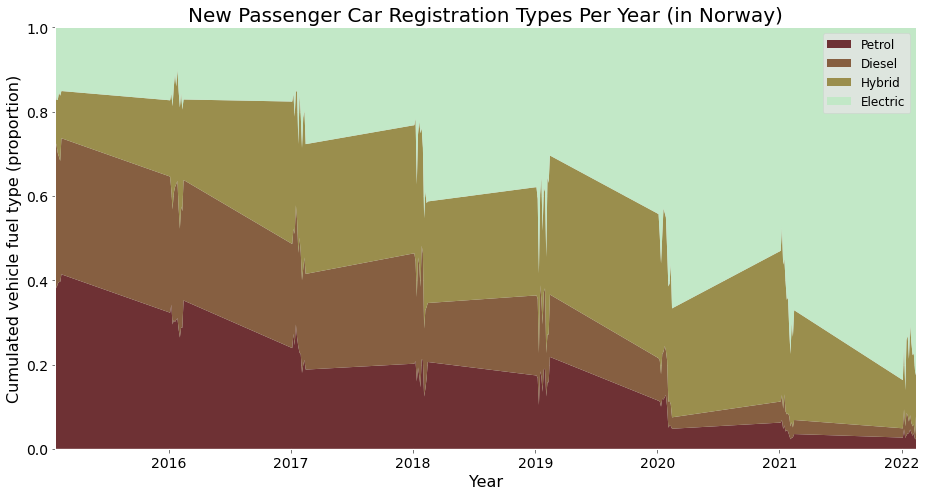

In [23]:
plt.figure(figsize=(13, 7))

plt.stackplot(data["Unnamed: 0"],
              [data['Nye ikkehybridsdiesel Andel'], data['Nye ikkehybridsbensin Andel'],
               data['Hybrid Andel'], data['Nullutslipp Andel']],
              labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'],
              alpha=1, colors=["#6e3134", "#865f41", "#9a8e4d", "#c2e8c7"]) #, ec="black"

plt.tick_params(labelsize=14)
plt.xlabel('Year', size=16, color="black")
plt.ylabel('Cumulated vehicle fuel type (proportion)', size=16, color="black")
# Set the y-axis limits to go from 0 to 1
plt.ylim(ymin=0, ymax=1)
plt.xticks([201600, 201700, 201800, 201900, 202000, 202100, 202200], ["2016", "2017", "2018", "2019", "2020", "2021", "2022"], fontsize=14, color="black")
plt.yticks(fontsize=14, color="black")  # Increase the font size of y-axis tick labels
plt.title("New Passenger Car Registration Types Per Year (in Norway)", fontsize=20)

plt.legend(labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'], loc='upper right', fontsize='large', frameon=True)

# Set the x-axis limits to the first and last observations of the "Unnamed: 0" column
plt.xlim(xmin=data["Unnamed: 0"].min(), xmax=data["Unnamed: 0"].max())

plt.tight_layout()
plt.show()

In [23]:
data = data.loc[:, ['Unnamed: 0', 'Nye ikkehybridsdiesel Andel', 'Nye ikkehybridsbensin Andel', 'Hybrid Andel', 'Nullutslipp Andel']]


In [24]:
data.head()

,Unnamed: 0,Nye ikkehybridsdiesel Andel,Nye ikkehybridsbensin Andel,Hybrid Andel,Nullutslipp Andel
0,201507.0,0.397,0.333,0.128,0.142
1,201508.0,0.381,0.339,0.108,0.172
2,201509.0,0.392,0.310,0.126,0.171
3,201510.0,0.396,0.297,0.152,0.155
4,201511.0,0.396,0.287,0.155,0.162


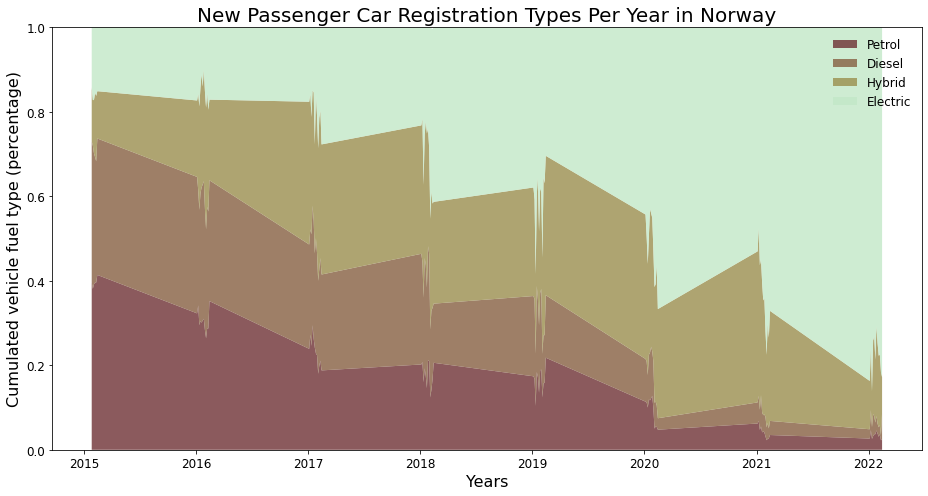

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))

x = data["Unnamed: 0"]
y1 = data['Nye ikkehybridsdiesel Andel']
y2 = data['Nye ikkehybridsbensin Andel']
y3 = data['Hybrid Andel']
y4 = data['Nullutslipp Andel']

plt.stackplot(x, y1, y2, y3, y4,
              labels=['Petrol', 'Diesel', 'Hybrid', 'Electric'],
              colors=["#6e3134", "#865f41", "#9a8e4d", "#c2e8c7"],
              alpha=0.8)

plt.tick_params(labelsize=12)
plt.xlabel('Years', size=16)
plt.ylabel('Cumulated vehicle fuel type (percentage)', size=16)
# Set the y-axis limits to go from 0 to 1
plt.ylim(ymin=0, ymax=1)
plt.xticks([201500, 201600, 201700, 201800, 201900, 202000, 202100, 202200], ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"])
plt.title("New Passenger Car Registration Types Per Year in Norway", fontsize=20)

plt.legend(loc='upper right', fontsize='large', frameon=False)

plt.tight_layout()
plt.show()



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [24]:
pd_l=pd.read_excel("/Users/antonglad/Master/csv_excel/kjorelengder_ssb.xlsx")
pd_l=pd.DataFrame(pd_l)


<Figure size 432x288 with 0 Axes>

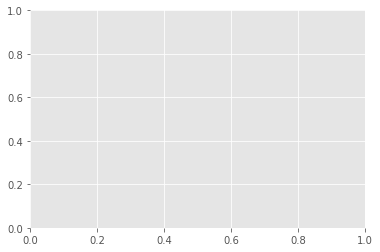

In [25]:
fig=plt.figure()
fig, ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


In [26]:
ax.plot(pd_l["Petrol"], pd_l["Year"], label="linear")
ax.plot(pd_l["Diesel"], pd_l["Year"], label="linear")
ax.plot(pd_l["Electricity"], pd_l["Year"], label="linear")

ax.set_title("Distance Travelled by Fuel Type per year in Norway")
ax.legend()


In [27]:
plt.show()

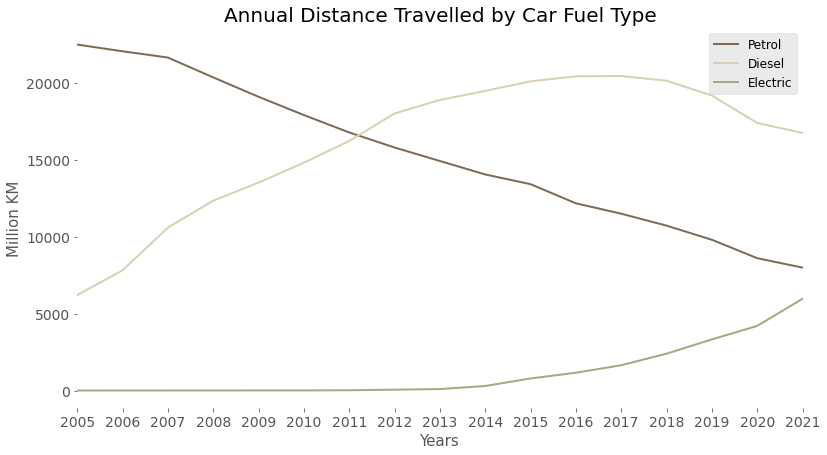

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(13, 7), facecolor="white")

plt.xticks(pd_l["Year"])
plt.xlim(xmin=pd_l["Year"][0],xmax=pd_l["Year"][16])
plt.title("Annual Distance Travelled by Car Fuel Type", fontsize=20)
plt.xlabel('Years', size=15)
plt.ylabel('Million KM', size=15)
plt.box(on=None)
ax.set(facecolor="white")
plt.tick_params(labelsize=14)

plt.plot(pd_l["Year"], pd_l["Petrol"], label="linear", color="#7d6b57", alpha=1, linewidth=2.0)
plt.plot(pd_l["Year"], pd_l["Diesel"], label="linear", color="#d9d0b4", alpha=1, linewidth=2.0)
plt.plot(pd_l["Year"], pd_l["Electricity"], label="linear", color="#9dad7f", alpha=1, linewidth=2.0)

plt.legend(labels=['Petrol', 'Diesel', 'Electric'], loc=1, fontsize='large', frameon=True)





<ipython-input-29-d15b66f437ee>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # Set a different style


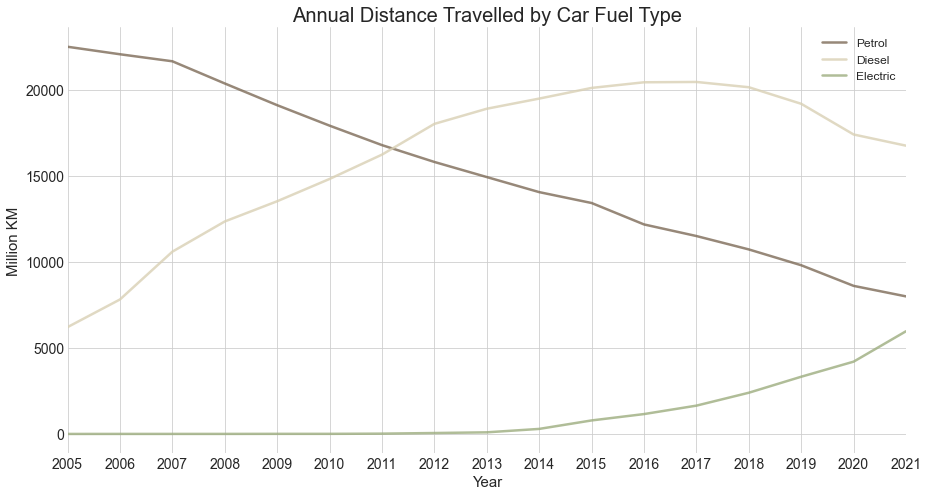

In [29]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")  # Set a different style

plt.figure(figsize=(13, 7), facecolor="white")  # Adjust figure size and background color

plt.xticks(pd_l["Year"])
plt.xlim(xmin=pd_l["Year"][0], xmax=pd_l["Year"][16])
plt.title("Annual Distance Travelled by Car Fuel Type", fontsize=20)
plt.xlabel('Year', size=15)
plt.ylabel('Million KM', size=15)
plt.box(False)  # Remove the box around the plot

plt.tick_params(labelsize=14)

plt.plot(pd_l["Year"], pd_l["Petrol"], label="Petrol", color="#7d6b57", alpha=0.8, linewidth=2.5)  # Adjust line appearance
plt.plot(pd_l["Year"], pd_l["Diesel"], label="Diesel", color="#d9d0b4", alpha=0.8, linewidth=2.5)  # Adjust line appearance
plt.plot(pd_l["Year"], pd_l["Electricity"], label="Electric", color="#9dad7f", alpha=0.8, linewidth=2.5)  # Adjust line appearance

plt.legend(labels=['Petrol', 'Diesel', 'Electric'], loc=1, fontsize='large')

plt.tight_layout()
plt.show()


<ipython-input-30-10d9803a19a5>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # Set a different style


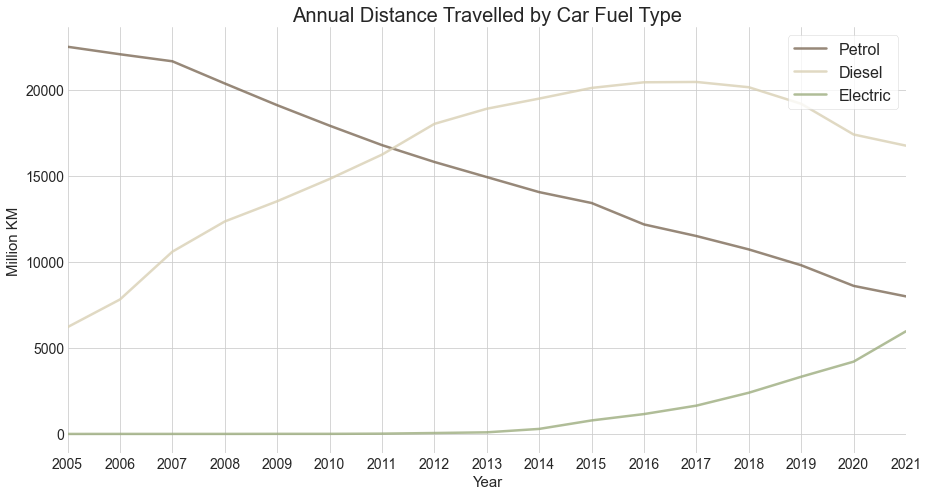

In [30]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")  # Set a different style

plt.figure(figsize=(13, 7), facecolor="white")  # Adjust figure size and background color

plt.xticks(pd_l["Year"])
plt.xlim(xmin=pd_l["Year"][0], xmax=pd_l["Year"][16])
plt.title("Annual Distance Travelled by Car Fuel Type", fontsize=20)
plt.xlabel('Year', size=15)
plt.ylabel('Million KM', size=15)
plt.box(False)  # Remove the box around the plot

plt.tick_params(labelsize=14)

plt.plot(pd_l["Year"], pd_l["Petrol"], label="Petrol", color="#7d6b57", alpha=0.8, linewidth=2.5)  # Adjust line appearance
plt.plot(pd_l["Year"], pd_l["Diesel"], label="Diesel", color="#d9d0b4", alpha=0.8, linewidth=2.5)  # Adjust line appearance
plt.plot(pd_l["Year"], pd_l["Electricity"], label="Electric", color="#9dad7f", alpha=0.8, linewidth=2.5)  # Adjust line appearance

plt.legend(labels=['Petrol', 'Diesel', 'Electric'], loc=1, fontsize=16, frameon=True)  # Increase the font size of the legend

plt.tight_layout()
plt.show()


<ipython-input-31-976fdb0b4e02>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # Set a different style


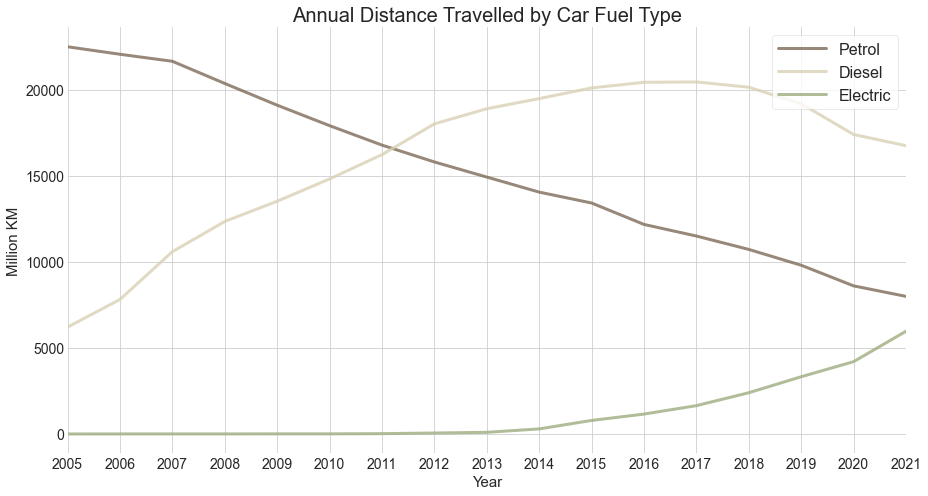

In [31]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")  # Set a different style

plt.figure(figsize=(13, 7), facecolor="white")  # Adjust figure size and background color

plt.xticks(pd_l["Year"])
plt.xlim(xmin=pd_l["Year"][0], xmax=pd_l["Year"][16])
plt.title("Annual Distance Travelled by Car Fuel Type", fontsize=20)
plt.xlabel('Year', size=15)
plt.ylabel('Million KM', size=15)
plt.box(False)  # Remove the box around the plot

plt.tick_params(labelsize=14)

plt.plot(pd_l["Year"], pd_l["Petrol"], label="Petrol", color="#7d6b57", alpha=0.8, linewidth=3.0)  # Increase line width
plt.plot(pd_l["Year"], pd_l["Diesel"], label="Diesel", color="#d9d0b4", alpha=0.8, linewidth=3.0)  # Increase line width
plt.plot(pd_l["Year"], pd_l["Electricity"], label="Electric", color="#9dad7f", alpha=0.8, linewidth=3.0)  # Increase line width

plt.legend(labels=['Petrol', 'Diesel', 'Electric'], loc=1, fontsize=16, frameon=True, handlelength=3)  # Increase the font size and line width of the legend

plt.tight_layout()
plt.show()


<ipython-input-34-63fb5df66a03>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # Set a different style


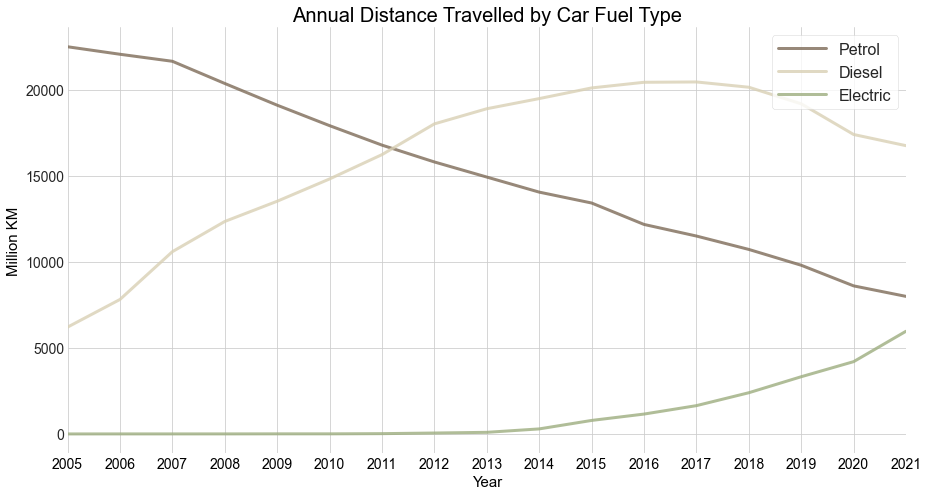

In [34]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")  # Set a different style

plt.figure(figsize=(13, 7), facecolor="white")  # Adjust figure size and background color

plt.xticks(pd_l["Year"], color="black")
plt.xlim(xmin=pd_l["Year"][0], xmax=pd_l["Year"][16])
plt.title("Annual Distance Travelled by Car Fuel Type", fontsize=20, color="black")
plt.xlabel('Year', size=15, color="black")
plt.ylabel('Million KM', size=15, color="black")
plt.box(False)  # Remove the box around the plot

plt.tick_params(labelsize=14, color="black")

plt.plot(pd_l["Year"], pd_l["Petrol"], label="Petrol", color="#7d6b57", alpha=0.8, linewidth=3.0)  # Increase line width
plt.plot(pd_l["Year"], pd_l["Diesel"], label="Diesel", color="#d9d0b4", alpha=0.8, linewidth=3.0)  # Increase line width
plt.plot(pd_l["Year"], pd_l["Electricity"], label="Electric", color="#9dad7f", alpha=0.8, linewidth=3.0)  # Increase line width

plt.legend(labels=['Petrol', 'Diesel', 'Electric'], loc=1, fontsize=16, frameon=True, handlelength=3)  # Increase the font size and line width of the legend

plt.tight_layout()
plt.show()